In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from keras.regularizers import l1, l2
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 14s 0us/step


In [3]:
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',                'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',                'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',                'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',                'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',                'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',                'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',                'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',                'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',                'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',                'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [6]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), #S1
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), #S1
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(256, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
   

    keras.layers.Flatten(), #Flatten   
    keras.layers.Dense(512, activation='relu'), #F1
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(100, activation='softmax') #Output layer
])


In [10]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [11]:
lenet.compile(optimizer='Adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [12]:
hist = lenet.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test),verbose=1)

Epoch 1/50
1563/1563 [==============================] - 33s 12ms/step - loss: 4.2273 - accuracy: 0.0776 - val_loss: 3.8624 - val_accuracy: 0.1341
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 3.5541 - accuracy: 0.1541 - val_loss: 3.1218 - val_accuracy: 0.2256
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 3.0936 - accuracy: 0.2301 - val_loss: 2.7510 - val_accuracy: 0.2964
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.7945 - accuracy: 0.2888 - val_loss: 2.5845 - val_accuracy: 0.3298
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.5816 - accuracy: 0.3329 - val_loss: 2.6041 - val_accuracy: 0.3339
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4284 - accuracy: 0.3630 - val_loss: 2.3632 - val_accuracy: 0.3862
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2893 - accuracy: 0.3917 - val_loss: 2.1265 -

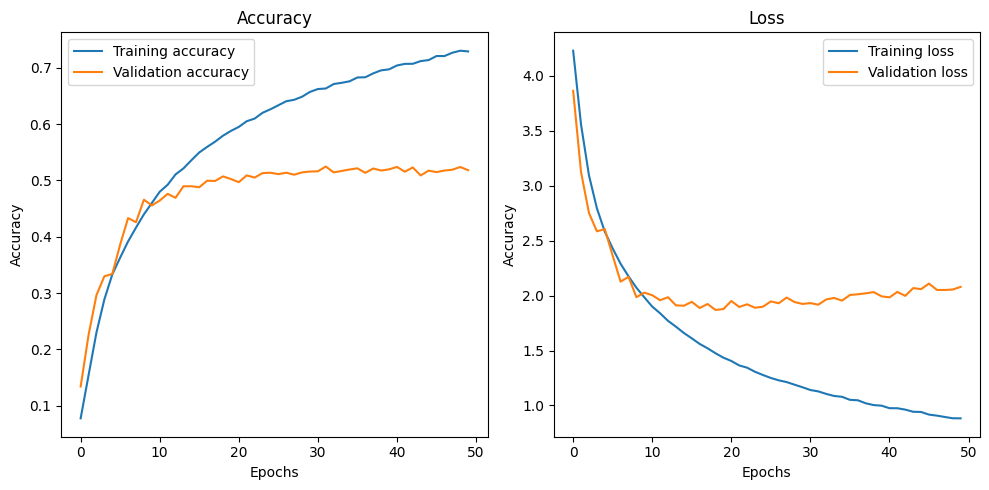

In [14]:
# create a 1x2 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot training and validation accuracy
axs[0].plot(hist.history['accuracy'], label='Training accuracy')
axs[0].plot(hist.history['val_accuracy'], label='Validation accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].set_title('Accuracy')

# plot training and validation loss
axs[1].plot(hist.history['loss'], label='Training loss')
axs[1].plot(hist.history['val_loss'], label='Validation loss')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].set_title('Loss')

# adjust layout
plt.tight_layout()

# show the figure
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 3ms/step


array([[68,  2,  2, ...,  0,  0,  0],
       [ 0, 64,  0, ...,  0,  0,  2],
       [ 1,  0, 40, ...,  2,  3,  0],
       ...,
       [ 0,  0,  1, ..., 61,  0,  0],
       [ 0,  0,  5, ...,  3, 32,  0],
       [ 0,  0,  0, ...,  0,  0, 50]])

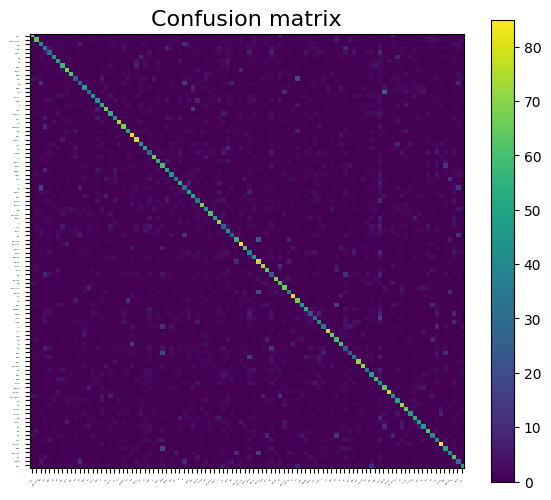

In [16]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(100), classes, rotation=45, fontsize=1)
plt.yticks(np.arange(100), classes, fontsize=1)
plt.colorbar()
plt.show()

In [17]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.5181


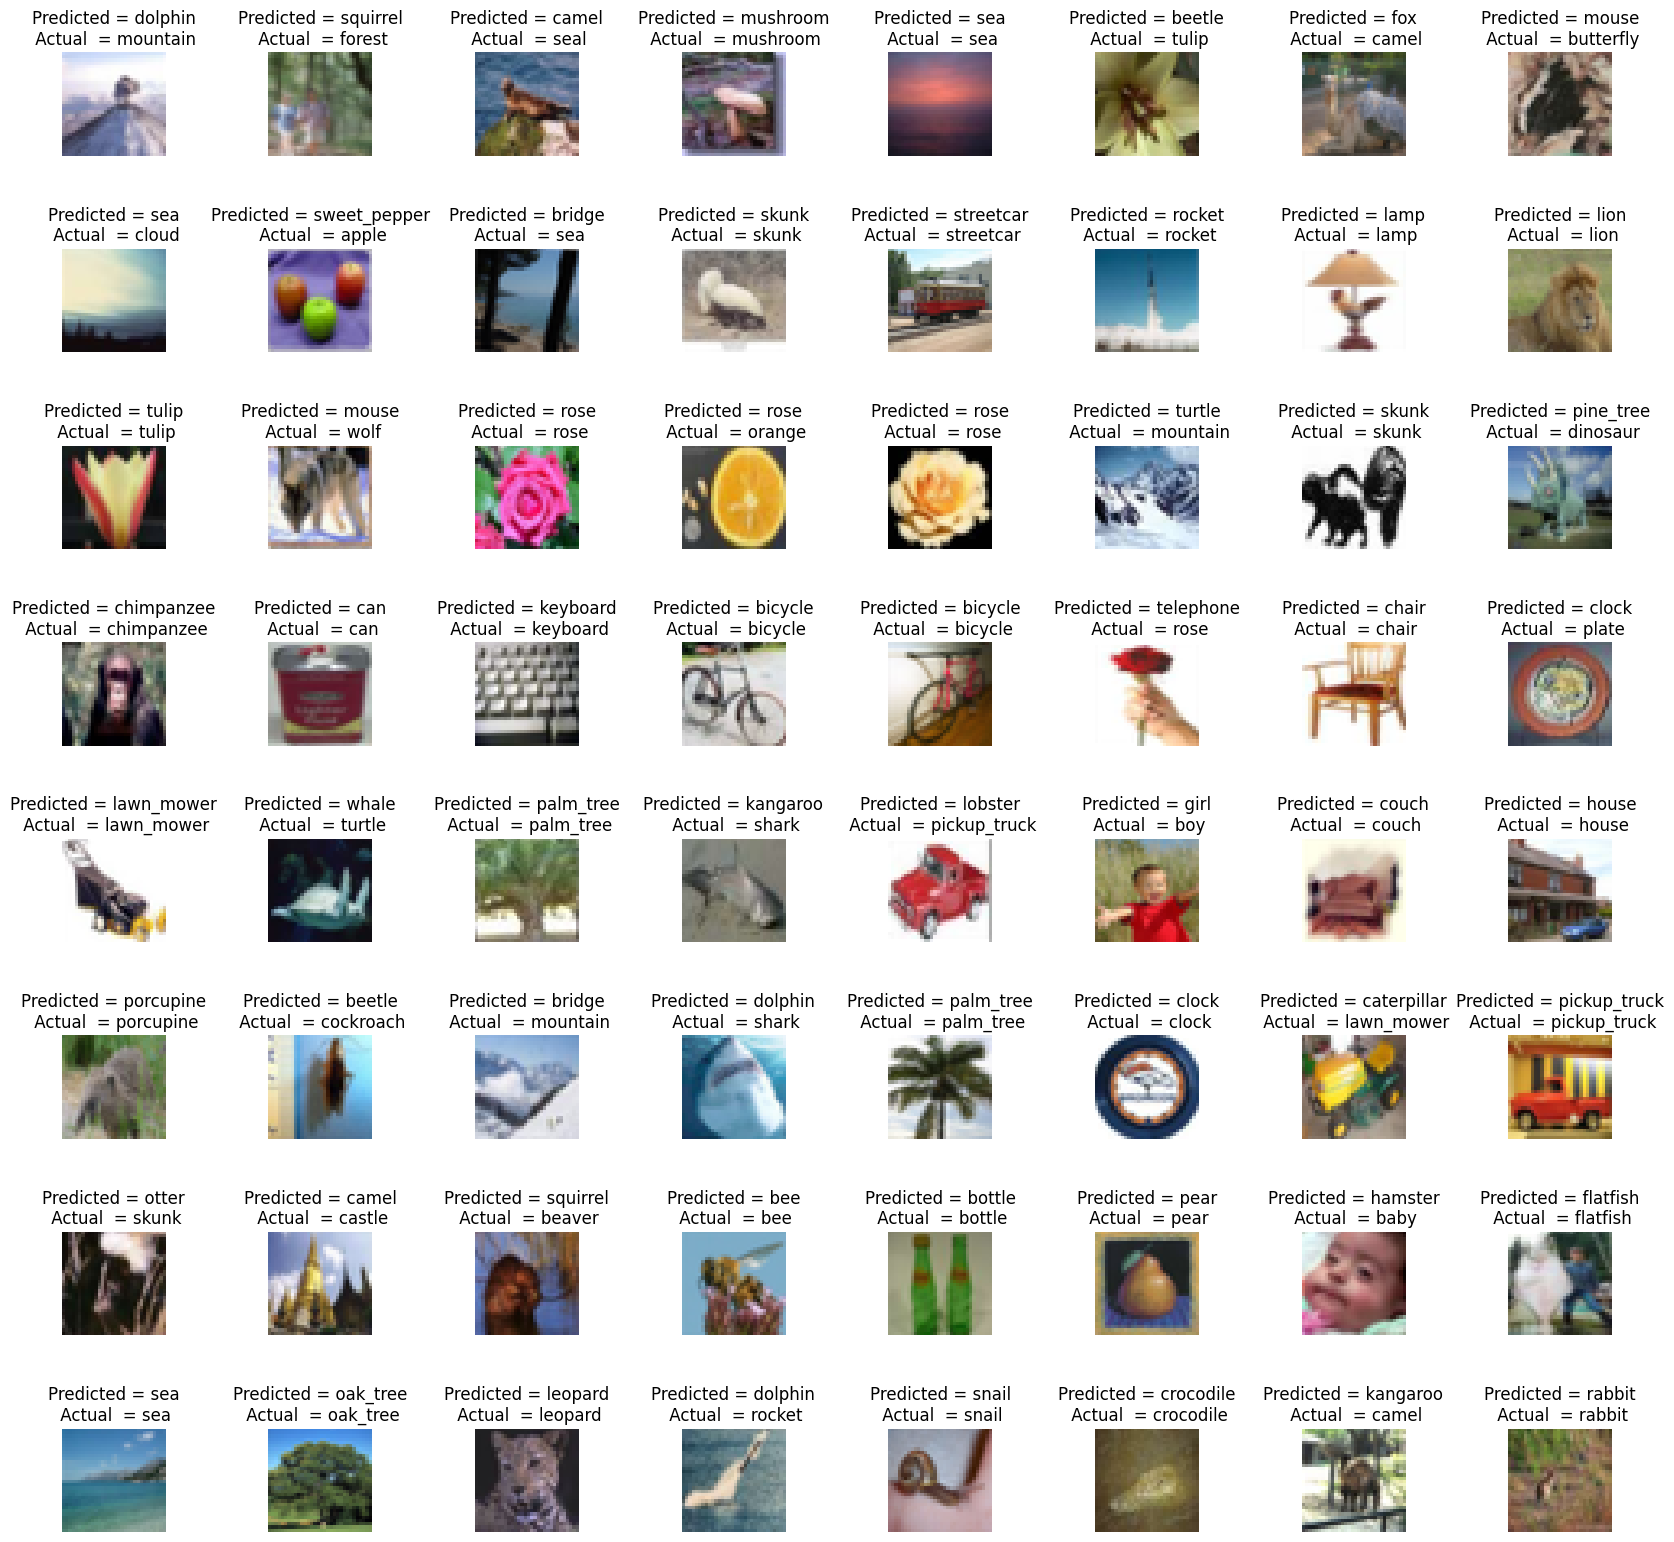

In [18]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)